<a href="https://colab.research.google.com/github/KhalinaA/Digital_Image_Processing/blob/main/PR_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imageai # установка библиотеки ImageAI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 KB 8.5 MB/s eta 0:00:00


# Добавляем в проект исходное изображение:

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from urllib.request import urlopen
req = urlopen('https://img.youscreen.ru/wall/14977257054998/14977257054998_1920x1200.jpg') # используя метод urlopen, получаем объект запроса по ссылке (изображение)
                                                                                      # и сохраняем его в виде потокового набора данных в переменную "req"

image_2 = np.asarray(bytearray(req.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
image_2 = cv2.imdecode(image_2, -1) # декодируем изображение в привычный для отображения формат

cv2_imshow(image_2) # Выводим изображение, используя метод cv2_imshow()

# Пример №1. Детекция

[Техническая документация](https://imageai.readthedocs.io/en/latest/detection/index.html)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_backbone' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to pass

[{'name': 'cat', 'percentage_probability': 87.99, 'box_points': [694, 479, 1705, 1116]}]


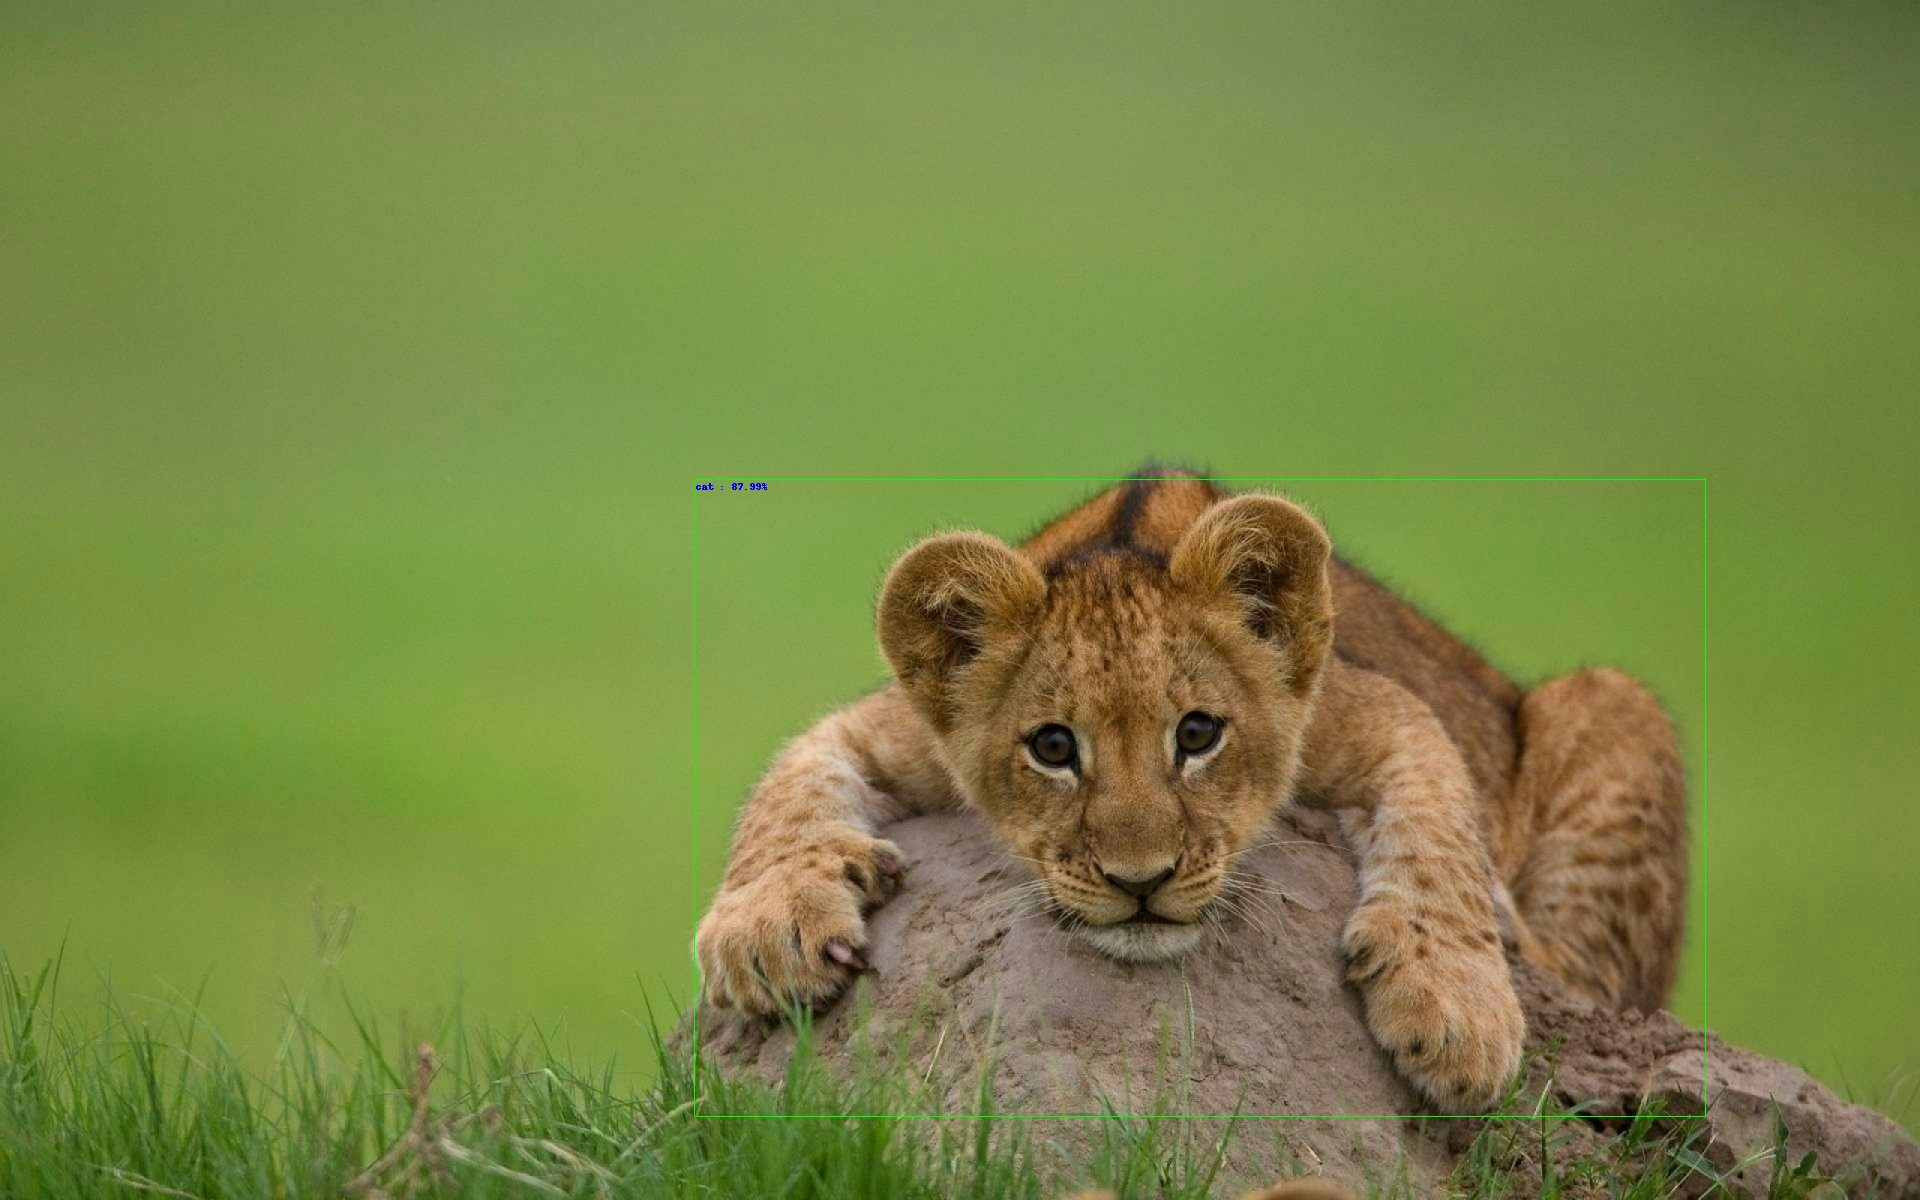

In [ ]:
from imageai.Detection import ObjectDetection # Импортируем из библиотеки imageai класс ObjectDetection для поиска объектов
import os # Импортируем библиотеку os для взаимодействия с ОС

exec_path = os.getcwd()# Объявляем переменную exec_path и помещаем в неё функцию os.getcwd()для указания пути к данному проекту (для удобства работы с файлами, находящимися в корневой папке проекта)

detector = ObjectDetection() # создаем объект класса ObjectDetection
detector.setModelTypeAsRetinaNet() # обращаемся к методу setModelTypeAsRetinaNet, тем самым устанавливая для использования в проекте модель RetinaNet для распознавания объектов
detector.setModelPath("/content/drive/MyDrive/retinanet.pth") # указываем путь к модели (предварительно модель необходимо скачать с официального сайта ImageAI и поместить в корневую папку проекта)
detector.loadModel() # загружаем модель

list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=image_2, # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=os.path.join(exec_path, "new_objects.jpg"), # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=60, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

print(list)
output_image = cv2.imread("/content/new_objects.jpg")
cv2_imshow(output_image)

# Пример №2. Классификация

[Техническая документация](https://imageai.readthedocs.io/en/latest/prediction/index.html)

In [ ]:
from imageai.Classification import ImageClassification
import os

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [ ]:
execution_path = "/content/drive/MyDrive/resnet50.pth"

prediction = ImageClassification()
prediction.setModelTypeAsResNet50()
prediction.setModelPath(execution_path)
prediction.loadModel()

ValueError: ignored

In [ ]:
predictions, probabilities = prediction.classifyImage((image_2), result_count=10)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)

snow leopard  :  64.198
Arctic fox  :  12.8115
grey fox  :  5.4439
fox squirrel  :  2.533
cheetah  :  2.2291
cougar  :  2.1936
leopard  :  1.3279
lynx  :  1.2737
lion  :  0.9759
Egyptian cat  :  0.3976


# Задание №1. Детекция объектов на изображении

1.1. Перейдите по ссылке из примера №1

1.2. Загрузите готовую модель для детекции объектов на изображении, отличную от той, что представлена в примере

1.3. Используя данную модель, обработе 5 изображений с больши набором объектов, которые относятся к разным классам

1.4. Визуализируйте полученные результаты

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Результаты для image1.jpg:
person  :  100.0  :  [494, 348, 610, 764]
person  :  99.99  :  [640, 387, 782, 786]
person  :  99.92  :  [608, 367, 681, 605]
person  :  99.98  :  [388, 374, 457, 605]
person  :  99.98  :  [1101, 366, 1277, 794]
person  :  99.96  :  [749, 356, 901, 793]
person  :  99.94  :  [892, 319, 1111, 798]
person  :  99.98  :  [454, 386, 512, 614]
person  :  99.89  :  [230, 364, 292, 554]
person  :  99.97  :  [270, 365, 402, 715]
car  :  96.74  :  [0, 364, 58, 425]
backpack  :  99.95  :  [939, 412, 1062, 602]
handbag  :  81.87  :  [789, 427, 884, 609]
handbag  :  92.17  :  [321, 436, 405, 579]
Результаты для image2.jpg:
person  :  99.97  :  [325, 168, 405, 251]
person  :  99.99  :  [482, 176, 551, 369]
person  :  99.99  :  [204, 180, 296, 403]
person  :  99.76  :  [564, 171, 660, 356]
person  :  99.99  :  [19, 192, 124, 348]
person  :  99.57  :  [94, 185, 153, 287]
person  :  99.88  :  [395, 170, 471, 261]
person  :  99.9  :  [546, 175, 600, 264]
bottle  :  65.4  :  [47

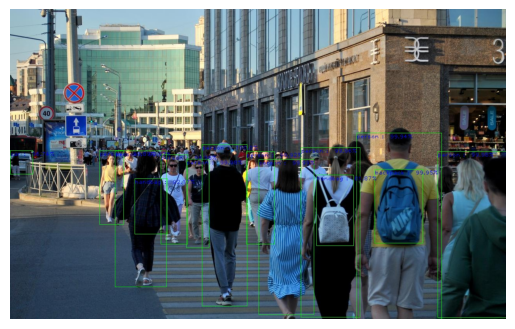

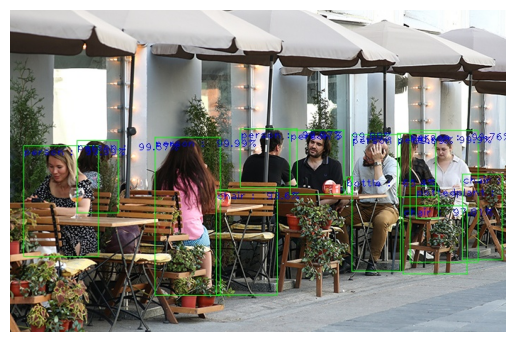

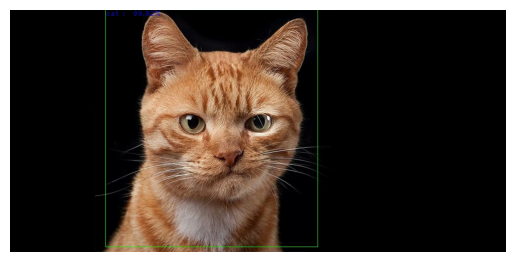

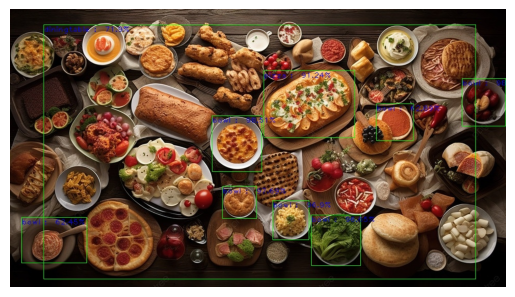

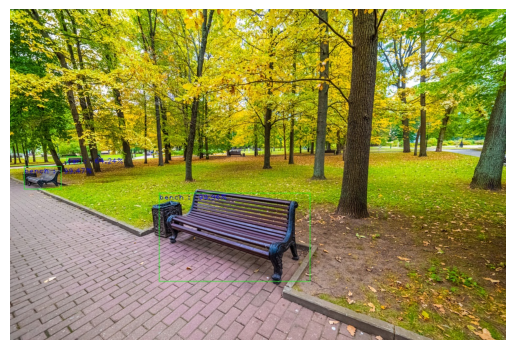

In [ ]:
!pip install imageai

from imageai.Detection import ObjectDetection
import os


# Установка пути к модели
model_path = '/content/drive/MyDrive/Colab Notebooks/PR_4/yolov3.pt'


detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_path)
detector.loadModel()

# Загрузка изображений для обработки
image_paths = ["image1.jpg", "image2.jpg", "image3.jpg", "image4.jpg", "image5.jpg"]

folder_path = "/content/drive/MyDrive/Colab Notebooks/PR_4/FOTO/"



# Обработка и визуализация результатов
for image_path in image_paths:
    detections = detector.detectObjectsFromImage(input_image=folder_path + image_path, output_image_path=f"{folder_path}output_{image_path}")

    print(f"Результаты для {image_path}:")
    for detection in detections:
        print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

# Визуализация изображений
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for image_path in image_paths:
    output_image_path = f"{folder_path}output_{image_path}"
    img = mpimg.imread(output_image_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()



# Задание №2. Классификация изображений

2.1. Перейдите по ссылке из примера №2

2.2. Загрузите готовую модель для классификации изображений, отличную от той, что представлена в примере

2.3. Используя данную модель, обработе 5 изображений, которые относятся к разным классам

2.4. Сохраните полученные предсказания используемой модели

In [22]:
!pip install imageai

from imageai.Classification import ImageClassification
import os

# Установка пути к модели DenseNet121
model_path = '/content/drive/MyDrive/Colab Notebooks/PR_4/densenet121.pth'

# Создание объекта для классификации
classifier = ImageClassification()
classifier.setModelTypeAsDenseNet121()
classifier.setModelPath(model_path)
classifier.loadModel()


image_paths = ["/content/drive/MyDrive/Colab Notebooks/PR_4/FOTO2/image1.jpg", "/content/drive/MyDrive/Colab Notebooks/PR_4/FOTO2/image2.jpg", "/content/drive/MyDrive/Colab Notebooks/PR_4/FOTO2/image3.jpg", "/content/drive/MyDrive/Colab Notebooks/PR_4/FOTO2/image4.jpg", "/content/drive/MyDrive/Colab Notebooks/PR_4/FOTO2/image5.jpg"]

# Обработка и сохранение предсказаний
predictions_list = []

for image_path in image_paths:
    predictions, probabilities = classifier.classifyImage(image_path, result_count=1)
    prediction = {"image_path": image_path, "class": predictions[0], "probability": probabilities[0]}
    predictions_list.append(prediction)

# Вывод предсказаний
for prediction in predictions_list:
    print(f"Изображение: {prediction['image_path']}")
    print(f"Класс: {prediction['class']}")
    print(f"Вероятность: {prediction['probability']:.2%}")
    print()

# Сохранение предсказаний в файл
output_file_path = "/content/drive/MyDrive/Colab Notebooks/PR_4/densenet121_classification_predictions.txt"

with open(output_file_path, 'w') as f:
    for prediction in predictions_list:
        f.write(f"Изображение: {prediction['image_path']}\n")
        f.write(f"Класс: {prediction['class']}\n")
        f.write(f"Вероятность: {prediction['probability']:.2%}\n\n")


Изображение: /content/drive/MyDrive/Colab Notebooks/PR_4/FOTO2/image1.jpg
Класс: pickup
Вероятность: 7978.09%

Изображение: /content/drive/MyDrive/Colab Notebooks/PR_4/FOTO2/image2.jpg
Класс: Eskimo dog
Вероятность: 5630.71%

Изображение: /content/drive/MyDrive/Colab Notebooks/PR_4/FOTO2/image3.jpg
Класс: notebook
Вероятность: 6335.39%

Изображение: /content/drive/MyDrive/Colab Notebooks/PR_4/FOTO2/image4.jpg
Класс: mountain bike
Вероятность: 9876.27%

Изображение: /content/drive/MyDrive/Colab Notebooks/PR_4/FOTO2/image5.jpg
Класс: broccoli
Вероятность: 9999.49%



# Задание №3. Детекция и трекинг объектов на видеопотоке

## 3.1. Подготовка набора данных:

* Найдите и загрузите из сети Интернет 5 видеофайлов с большим количеством разнородных объектов в кадре (например запись с камеры видеонаблюдения на шоссе и тд) длительностью от 30 секунд до 1 минуты (Также Вы можете скачать видеофайл большей длительности, а затем обрезать его в одном из [онлйан-сервисов](https://online-video-cutter.com/ru/?ysclid=lfjb8zk8er484677266).


* Для более оптимальной работы с видеофайлами, сожмите их, используя онлайн-сервисы. ([Например тут](https://compress-video-online.com/ru/ ))

## 3.2. Детекция и трекинг объектов на видеопотоке

3.2.1. [Ознакомьтесь с технической документацией](https://imageai.readthedocs.io/en/latest/video/index.html)

3.2.2. Загрузите готовую модель для детекции объектов

3.2.3. Используя данную модель, обработайте 5 видеофайлов (см. п. 3.1.)

3.2.4. Сохраните полученные видеофайлы

In [28]:
!pip install imageai torch

from imageai.Detection import VideoObjectDetection
import torch

# Установка пути к модели TinyYOLOv3
model_path = '/content/drive/MyDrive/Colab Notebooks/PR_4/tiny-yolov3.pt'

# Создание объекта для детекции и трекинга объектов на видео
detector = VideoObjectDetection()
detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath(model_path)
detector.loadModel()

# Установка пути к видеофайлам
video_paths = [
    "/content/drive/MyDrive/Colab Notebooks/PR_4/VIDEO/video1.mp4",
    "/content/drive/MyDrive/Colab Notebooks/PR_4/VIDEO/video2.mp4",
    "/content/drive/MyDrive/Colab Notebooks/PR_4/VIDEO/video3.mp4",
    "/content/drive/MyDrive/Colab Notebooks/PR_4/VIDEO/video4.mp4",
    "/content/drive/MyDrive/Colab Notebooks/PR_4/VIDEO/video5.mp4"
]

# Обработка и сохранение видеофайлов
base_path = "/content/drive/MyDrive/Colab Notebooks/PR_4/OUTPUT/"


for video_path in video_paths:
    output_video_path = f"{base_path}output_{os.path.basename(video_path)}"

    detections = detector.detectObjectsFromVideo(
        input_file_path=video_path,
        output_file_path=output_video_path,
        frames_per_second=20,
        log_progress=True
    )

    print(f"Обработка видео: {video_path}")
    print(f"Сохранено по пути: {output_video_path}")
    print()

print("Сохраненные видеофайлы:")
for output_video_path in output_video_paths:
    print(output_video_path)


Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  